# Train CNN with MFCCs + Delta + Delta-Delta


## cnn_mfccs_delta_2


Inspired by https://arxiv.org/pdf/1912.10458


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_delta_zero_2'

train_csv = '../../../data/mfcc_delta_train_dataset.csv'
test_csv = '../../../data/mfcc_delta_test_dataset.csv'
val_csv = '../../../data/mfcc_delta_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDeltaDataset import MFCCDeltaDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCsDelta2 import CNNMFCCsDelta2

model = CNNMFCCsDelta2()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCsDelta2(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.3, inplace=False)
  (global_pool): Adaptive

Visualize the model


In [8]:
summary(model, (3, 40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 40, 172]             448
       BatchNorm2d-2          [-1, 16, 40, 172]              32
              ReLU-3          [-1, 16, 40, 172]               0
         MaxPool2d-4           [-1, 16, 20, 86]               0
            Conv2d-5           [-1, 32, 20, 86]           4,640
       BatchNorm2d-6           [-1, 32, 20, 86]              64
              ReLU-7           [-1, 32, 20, 86]               0
         MaxPool2d-8           [-1, 32, 10, 43]               0
            Conv2d-9           [-1, 64, 10, 43]          18,496
      BatchNorm2d-10           [-1, 64, 10, 43]             128
             ReLU-11           [-1, 64, 10, 43]               0
        MaxPool2d-12            [-1, 64, 5, 21]               0
           Conv2d-13           [-1, 128, 5, 21]          73,856
      BatchNorm2d-14           [-1, 128

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [10]:
trainset = MFCCDeltaDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDeltaDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDeltaDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=4, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=4, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=4, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 32.31it/s, Loss=1.5543365478515625, Elapsed=2.4695s, ETA=0.0000s]


Epoch 1 completed in 13.3281s
Train Loss: 1.4239075540462671 - Train Accuracy: 41.79914520250559
Validation Loss: 1.1569674317042034 - Validation Accuracy: 53.84128324187421

Epoch 2/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 31.10it/s, Loss=0.99756920337677, Elapsed=2.5583s, ETA=0.0000s]  


Epoch 2 completed in 13.1287s
Train Loss: 1.1204266064084334 - Train Accuracy: 53.40675244793198
Validation Loss: 1.0421440116564433 - Validation Accuracy: 56.912199240185736

Epoch 3/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 34.73it/s, Loss=0.7455814480781555, Elapsed=2.3468s, ETA=0.0000s]

Epoch 3 completed in 12.4920s
Train Loss: 1.0132030320994427 - Train Accuracy: 57.41163700504285
Validation Loss: 1.0061931133270263 - Validation Accuracy: 59.36048965808358

Epoch 4/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 32.73it/s, Loss=0.8423700332641602, Elapsed=2.4595s, ETA=0.0000s]

Epoch 4 completed in 12.4375s
Train Loss: 0.9412708961205676 - Train Accuracy: 59.79059722756157
Validation Loss: 1.0872786410649617 - Validation Accuracy: 55.118193330519205

EarlyStopping counter: 1/7
Epoch 5/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 31.65it/s, Loss=0.32636758685112, Elapsed=2.5678s, ETA=0.0000s]  


Epoch 5 completed in 12.9660s
Train Loss: 0.8981454635975678 - Train Accuracy: 61.81452251192873
Validation Loss: 0.899212288459142 - Validation Accuracy: 60.47910510764035

Epoch 6/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 28.83it/s, Loss=1.1911050081253052, Elapsed=2.7610s, ETA=0.0000s]

Epoch 6 completed in 13.0022s
Train Loss: 0.8621501760675728 - Train Accuracy: 63.30024196648652
Validation Loss: 0.9061760091781617 - Validation Accuracy: 63.180666948079356

EarlyStopping counter: 1/7
Epoch 7/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 29.56it/s, Loss=0.6174846291542053, Elapsed=2.6937s, ETA=0.0000s]


Epoch 7 completed in 12.7971s
Train Loss: 0.8339017297146637 - Train Accuracy: 64.39474457836775
Validation Loss: 0.8651278297106425 - Validation Accuracy: 63.011819333051925

Epoch 8/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 33.38it/s, Loss=0.5111266374588013, Elapsed=2.4240s, ETA=0.0000s]


Epoch 8 completed in 12.4743s
Train Loss: 0.7973236889508418 - Train Accuracy: 65.9302141516474
Validation Loss: 0.8429006044069925 - Validation Accuracy: 66.37821865766146

Epoch 9/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 33.58it/s, Loss=0.6514179706573486, Elapsed=2.4161s, ETA=0.0000s]


Epoch 9 completed in 12.3451s
Train Loss: 0.7858030534204031 - Train Accuracy: 66.43223807693177
Validation Loss: 0.7919410220781962 - Validation Accuracy: 65.82946390882228

Epoch 10/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 33.52it/s, Loss=1.1240532398223877, Elapsed=2.4169s, ETA=0.0000s]

Epoch 10 completed in 12.2787s
Train Loss: 0.7550918513295278 - Train Accuracy: 67.67372967594582
Validation Loss: 0.8516874043146769 - Validation Accuracy: 63.243984803714646

EarlyStopping counter: 1/7
Epoch 11/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 32.91it/s, Loss=0.7890535593032837, Elapsed=2.4697s, ETA=0.0000s]

Epoch 11 completed in 12.8745s
Train Loss: 0.7383148494483418 - Train Accuracy: 68.04685556635988
Validation Loss: 0.7630144373575847 - Validation Accuracy: 69.1114394259181

Epoch 12/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 32.11it/s, Loss=0.33975139260292053, Elapsed=2.5143s, ETA=0.0000s]

Epoch 12 completed in 12.4535s
Train Loss: 0.7175200025987074 - Train Accuracy: 68.9785396078786
Validation Loss: 0.7801893051465353 - Validation Accuracy: 66.2621359223301

EarlyStopping counter: 1/7
Epoch 13/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 35.57it/s, Loss=0.5598560571670532, Elapsed=2.2843s, ETA=0.0000s]

Epoch 13 completed in 13.3047s
Train Loss: 0.7012154635666423 - Train Accuracy: 69.59137061577078
Validation Loss: 0.7742561984062195 - Validation Accuracy: 64.9219079780498

EarlyStopping counter: 2/7
Epoch 14/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.98it/s, Loss=1.0352561473846436, Elapsed=2.3235s, ETA=0.0000s]

Epoch 14 completed in 12.4379s
Train Loss: 0.6764658121015296 - Train Accuracy: 70.45973632437077
Validation Loss: 0.9765180277824402 - Validation Accuracy: 57.87252005065429

EarlyStopping counter: 3/7
Epoch 15/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.68it/s, Loss=0.5867063999176025, Elapsed=2.3424s, ETA=0.0000s]

Epoch 15 completed in 12.2495s
Train Loss: 0.6667404548625726 - Train Accuracy: 70.6994414418489
Validation Loss: 0.8099856925010681 - Validation Accuracy: 66.09328830730266

EarlyStopping counter: 4/7
Epoch 16/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.10it/s, Loss=0.31755316257476807, Elapsed=2.3784s, ETA=0.0000s]


Epoch 16 completed in 12.3873s
Train Loss: 0.6536946066714435 - Train Accuracy: 71.59494357884263
Validation Loss: 0.7730661396185557 - Validation Accuracy: 69.36471084845927

EarlyStopping counter: 5/7
Epoch 17/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 35.00it/s, Loss=0.5012195110321045, Elapsed=2.3207s, ETA=0.0000s] 


Epoch 17 completed in 12.0386s
Train Loss: 0.6345543926850908 - Train Accuracy: 72.096967504127
Validation Loss: 0.7556989673773448 - Validation Accuracy: 65.29126213592234

Epoch 18/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 33.58it/s, Loss=1.0604197978973389, Elapsed=2.4043s, ETA=0.0000s]


Epoch 18 completed in 12.3354s
Train Loss: 0.6248458514496081 - Train Accuracy: 72.54697994165667
Validation Loss: 0.7926273949941 - Validation Accuracy: 71.87631912199241

EarlyStopping counter: 1/7
Epoch 19/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 31.61it/s, Loss=0.9124206304550171, Elapsed=2.5352s, ETA=0.0000s]

Epoch 19 completed in 12.6119s
Train Loss: 0.614784833151481 - Train Accuracy: 72.95854910562855
Validation Loss: 0.7240199073155721 - Validation Accuracy: 71.24314056563951

Epoch 20/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 30.52it/s, Loss=0.55951988697052, Elapsed=2.6328s, ETA=0.0000s]  


Epoch 20 completed in 12.8213s
Train Loss: 0.6085282496117443 - Train Accuracy: 73.1846860089098
Validation Loss: 0.7179693571726481 - Validation Accuracy: 71.15871675812579

Epoch 21/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 30.38it/s, Loss=0.44396886229515076, Elapsed=2.6447s, ETA=0.0000s]

Epoch 21 completed in 13.8603s
Train Loss: 0.58781413019048 - Train Accuracy: 73.86309671875352
Validation Loss: 0.7450625662008922 - Validation Accuracy: 70.2511608273533

EarlyStopping counter: 1/7
Epoch 22/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 31.72it/s, Loss=0.5290853977203369, Elapsed=2.5393s, ETA=0.0000s] 


Epoch 22 completed in 12.6458s
Train Loss: 0.5770406751446642 - Train Accuracy: 74.35833653693946
Validation Loss: 0.7761376146475474 - Validation Accuracy: 74.01857323765302

EarlyStopping counter: 2/7
Epoch 23/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 34.32it/s, Loss=0.3860207498073578, Elapsed=2.3763s, ETA=0.0000s] 

Epoch 23 completed in 12.4238s
Train Loss: 0.5679768286860747 - Train Accuracy: 74.5844734402207
Validation Loss: 0.7415811284383138 - Validation Accuracy: 70.36724356268468

EarlyStopping counter: 3/7
Epoch 24/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.62it/s, Loss=0.6459869742393494, Elapsed=2.4017s, ETA=0.0000s] 


Epoch 24 completed in 12.6336s
Train Loss: 0.5561120980392301 - Train Accuracy: 75.08649736550508
Validation Loss: 0.7412772476673126 - Validation Accuracy: 69.77627691008864

EarlyStopping counter: 4/7
Epoch 25/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 35.37it/s, Loss=0.7116504311561584, Elapsed=2.2757s, ETA=0.0000s]

Epoch 25 completed in 12.4684s
Train Loss: 0.5430836945427635 - Train Accuracy: 75.6699305759707
Validation Loss: 0.9066136678059896 - Validation Accuracy: 70.29337273111017

EarlyStopping counter: 5/7
Epoch 26/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 35.60it/s, Loss=0.49348175525665283, Elapsed=2.2858s, ETA=0.0000s]

Epoch 26 completed in 12.0219s
Train Loss: 0.5317346479506851 - Train Accuracy: 75.93224938377693
Validation Loss: 0.7044719346364339 - Validation Accuracy: 73.49092444069227

Epoch 27/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.35it/s, Loss=0.37033867835998535, Elapsed=2.4304s, ETA=0.0000s]

Epoch 27 completed in 12.1846s
Train Loss: 0.5217841328740809 - Train Accuracy: 76.40035277356911
Validation Loss: 0.7060398435592652 - Validation Accuracy: 69.96623047699451

EarlyStopping counter: 1/7
Epoch 28/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.20it/s, Loss=0.7417343854904175, Elapsed=2.3750s, ETA=0.0000s]


Epoch 28 completed in 12.8993s
Train Loss: 0.5117405758083211 - Train Accuracy: 76.58804640329255
Validation Loss: 0.7778131214777628 - Validation Accuracy: 72.45673279864921

EarlyStopping counter: 2/7
Epoch 29/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 34.92it/s, Loss=0.45841649174690247, Elapsed=2.3084s, ETA=0.0000s]


Epoch 29 completed in 12.6059s
Train Loss: 0.5145172004754832 - Train Accuracy: 76.65362610524411
Validation Loss: 0.7521551764011383 - Validation Accuracy: 74.55677501055298

EarlyStopping counter: 3/7
Epoch 30/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 32.65it/s, Loss=0.12972241640090942, Elapsed=2.4820s, ETA=0.0000s]

Epoch 30 completed in 13.1478s
Train Loss: 0.4916842939019892 - Train Accuracy: 77.20992288731598
Validation Loss: 0.7593159528573354 - Validation Accuracy: 70.26171380329252

EarlyStopping counter: 4/7
Epoch 31/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 35.46it/s, Loss=0.3397068977355957, Elapsed=2.3122s, ETA=0.0000s]

Epoch 31 completed in 13.5131s
Train Loss: 0.47761351516136547 - Train Accuracy: 77.94486782298003
Validation Loss: 0.7033229279518127 - Validation Accuracy: 72.31954411143943

Epoch 32/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.88it/s, Loss=0.4487462043762207, Elapsed=2.3900s, ETA=0.0000s] 


Epoch 32 completed in 12.4881s
Train Loss: 0.4780598177730693 - Train Accuracy: 77.84084484747066
Validation Loss: 0.703267389535904 - Validation Accuracy: 72.74166314900802

Epoch 33/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 31.89it/s, Loss=0.18640904128551483, Elapsed=2.5213s, ETA=0.0000s]

Epoch 33 completed in 12.7267s
Train Loss: 0.4677299659031664 - Train Accuracy: 78.34286877275503
Validation Loss: 0.679182891647021 - Validation Accuracy: 70.9476572393415

Epoch 34/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 34.82it/s, Loss=0.24950926005840302, Elapsed=2.3125s, ETA=0.0000s]


Epoch 34 completed in 13.3626s
Train Loss: 0.462975064540185 - Train Accuracy: 78.53282377151127
Validation Loss: 0.8896205526590347 - Validation Accuracy: 69.91346559729844

EarlyStopping counter: 1/7
Epoch 35/100


Validating: 100%|██████████| 75/75 [00:02<00:00, 33.25it/s, Loss=0.35275498032569885, Elapsed=2.4337s, ETA=0.0000s]

Epoch 35 completed in 12.6916s
Train Loss: 0.45314235132553676 - Train Accuracy: 78.87655186449877
Validation Loss: 0.7239995161692302 - Validation Accuracy: 72.76276910088644

EarlyStopping counter: 2/7
Epoch 36/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.30it/s, Loss=0.5223344564437866, Elapsed=2.4294s, ETA=0.0000s] 

Epoch 36 completed in 12.6901s
Train Loss: 0.44197675801081465 - Train Accuracy: 79.22254132651906
Validation Loss: 0.8375889607270559 - Validation Accuracy: 73.723089911355

EarlyStopping counter: 3/7
Epoch 37/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 31.24it/s, Loss=0.6615160703659058, Elapsed=2.5663s, ETA=0.0000s]

Epoch 37 completed in 13.2289s
Train Loss: 0.44042282900369234 - Train Accuracy: 79.38083715881594
Validation Loss: 0.7186236508687337 - Validation Accuracy: 73.05825242718447

EarlyStopping counter: 4/7
Epoch 38/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 30.09it/s, Loss=0.283017098903656, Elapsed=2.6644s, ETA=0.0000s] 

Epoch 38 completed in 12.8783s
Train Loss: 0.4281289816074978 - Train Accuracy: 79.74491757309875
Validation Loss: 0.7702754982312521 - Validation Accuracy: 70.43056141831997

EarlyStopping counter: 5/7
Epoch 39/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 33.60it/s, Loss=0.10187633335590363, Elapsed=2.4170s, ETA=0.0000s]

Epoch 39 completed in 13.2292s
Train Loss: 0.4233869340895228 - Train Accuracy: 80.00045227380656
Validation Loss: 0.893725090622902 - Validation Accuracy: 69.49134655972983

EarlyStopping counter: 6/7
Epoch 40/100



Validating: 100%|██████████| 75/75 [00:02<00:00, 35.24it/s, Loss=0.36839452385902405, Elapsed=2.3095s, ETA=0.0000s]


Epoch 40 completed in 12.3037s
Train Loss: 0.4167773876059262 - Train Accuracy: 80.14517989190657
Validation Loss: 0.8074925716718038 - Validation Accuracy: 74.6517517940059

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


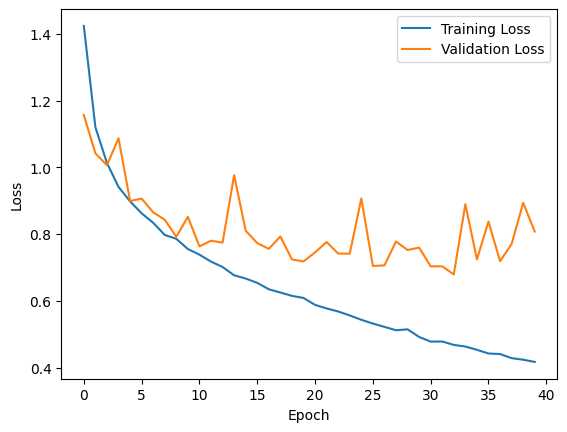

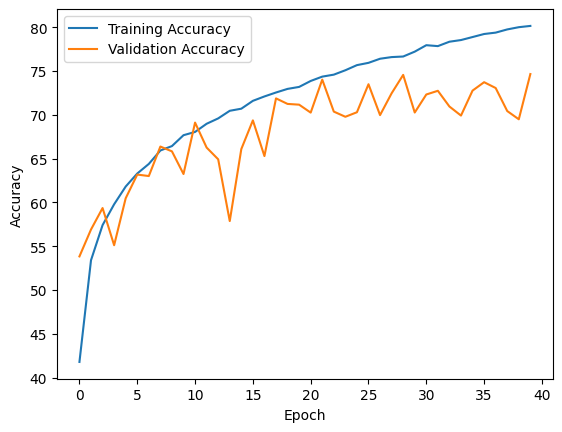

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:02<00:00, 29.49it/s]


Test Accuracy: 0.7393
Test Precision: 0.7608
Test Recall: 0.7393
Test F1-score: 0.7402

              precision    recall  f1-score   support

       Anger       0.79      0.77      0.78       916
       Bored       0.75      0.92      0.83      1098
     Disgust       0.80      0.49      0.61       291
        Fear       0.43      0.75      0.55       308
       Happy       0.82      0.60      0.69      1914
     Neutral       0.64      0.77      0.70      2226
    Question       0.90      0.81      0.85      1139
         Sad       0.86      0.68      0.76       857
    Surprise       0.74      0.77      0.76       728

    accuracy                           0.74      9477
   macro avg       0.75      0.73      0.72      9477
weighted avg       0.76      0.74      0.74      9477



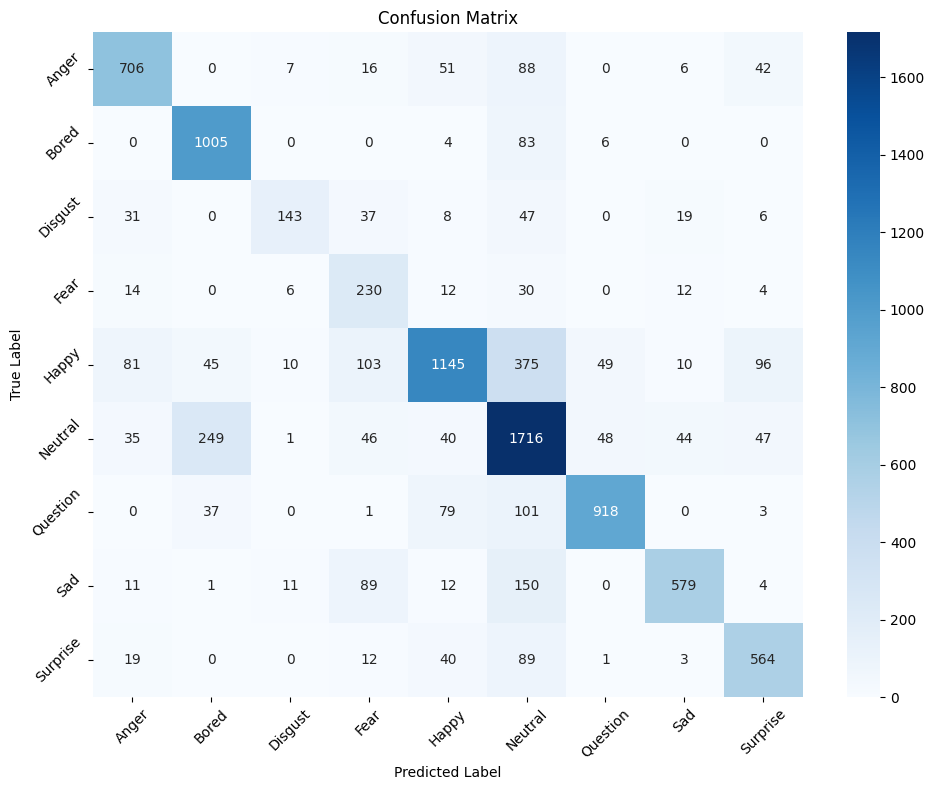

In [11]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)